In [2]:
with open("./data/2.8e-6_threshold.txt", 'r') as f:
   results = eval(f.readline())

print(results)

[('correlated_signal_attack_1.log', (0.8323446031079378, 0.0, 0.0, 0, [[0, 10688], [2086, 63418]])), ('correlated_signal_attack_2.log', (0.8908392507345739, 0.23069456427955135, 1.0, 0.37490141091928847, [[2139, 7133], [0, 56072]])), ('correlated_signal_attack_3.log', (0.8914285714285715, 0.2288458053995289, 1.0, 0.37245650250663526, [[1263, 4256], [0, 33681]])), ('fuzzing_attack_1.log', (0.8996271929824562, 0.0006597756762700682, 0.08333333333333333, 0.0013091861226271003, [[3, 4544], [33, 41020]])), ('fuzzing_attack_2.log', (0.9025337837837838, 0.001389854065323141, 0.26666666666666666, 0.00276529554096094, [[4, 2874], [11, 26711]])), ('fuzzing_attack_3.log', (0.83425, 0.0010050251256281408, 0.6666666666666666, 0.0020070245860511794, [[2, 1988], [1, 10009]])), ('max_engine_coolant_temp_attack.log', (0.894453642384106, 0.0004930966469428008, 0.07142857142857142, 0.0009794319294809011, [[3, 6081], [39, 51861]])), ('max_speedometer_attack_1.log', (0.9405440259117083, 0.0, 0.0, 0, [[0, 9

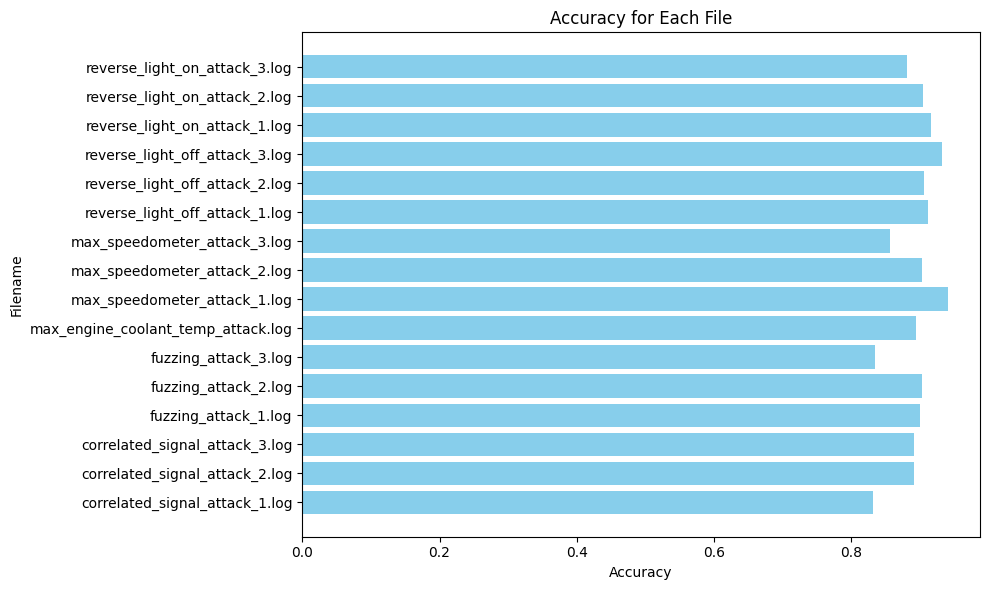

In [3]:
import matplotlib.pyplot as plt

#"results" is a list of tuples in the format ('filename', (accuracy, precision, recall, f1_score, confusion_matrix))
filenames = [result[0] for result in results]
accuracies = [result[1][0] for result in results]

#Plotting using horizontal bars
plt.figure(figsize=(10, 6))
plt.barh(filenames, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Filename')
plt.title('Accuracy for Each File')
plt.tight_layout()
plt.show()

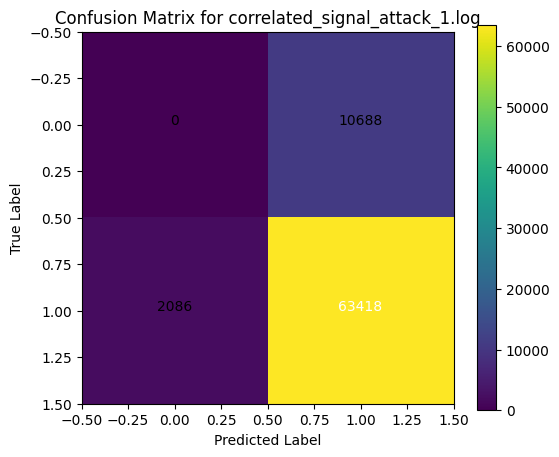

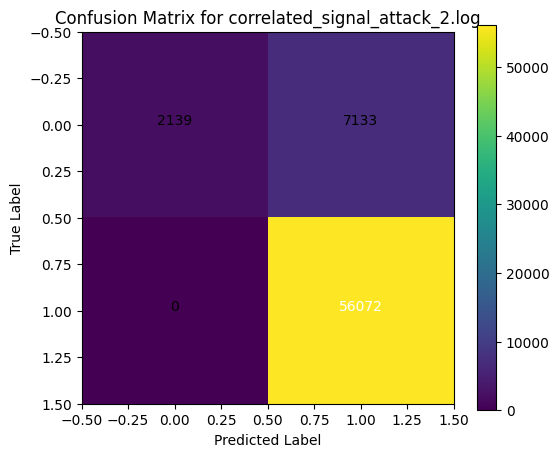

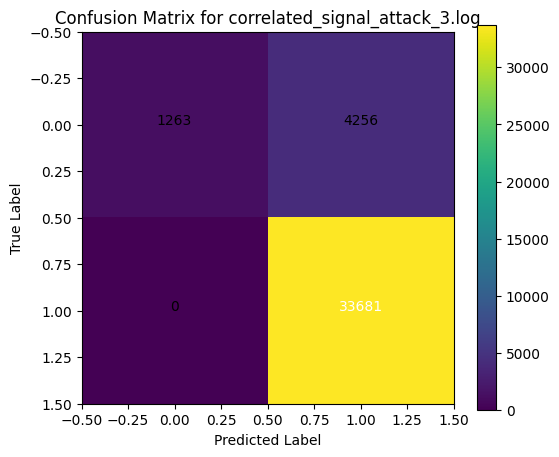

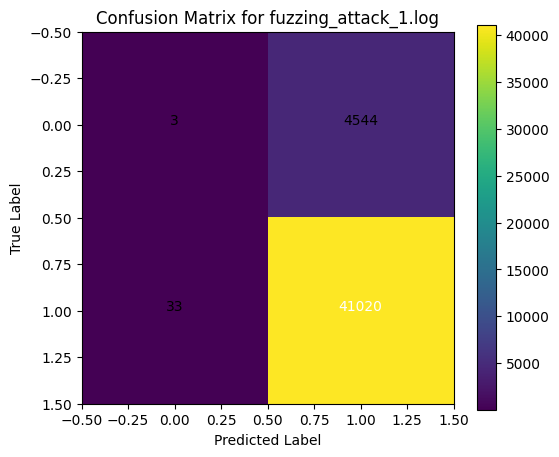

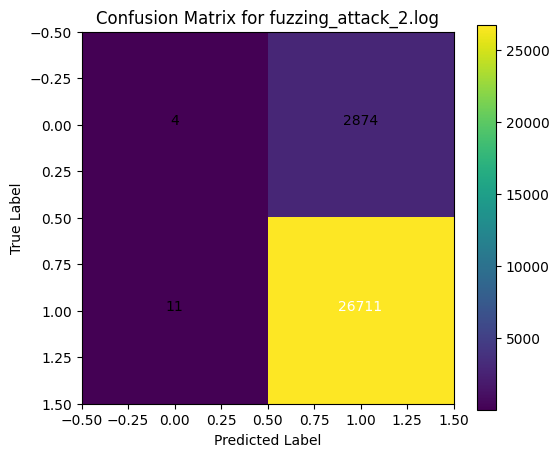

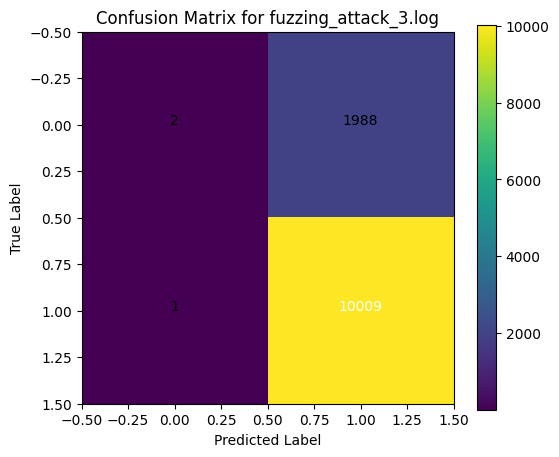

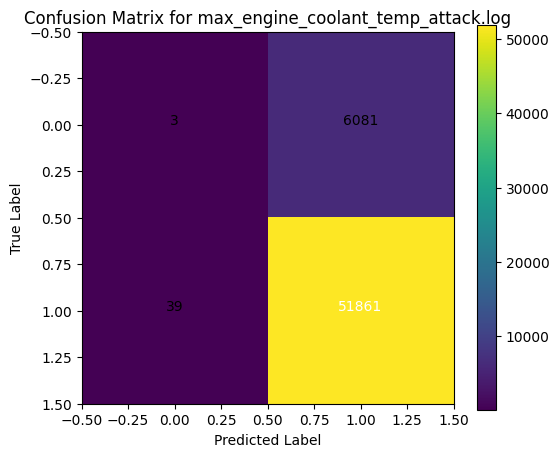

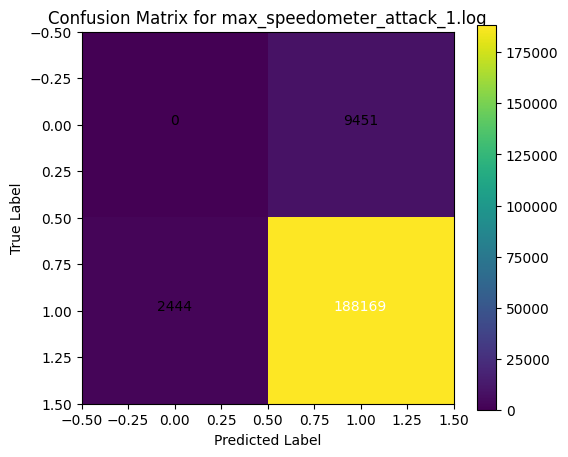

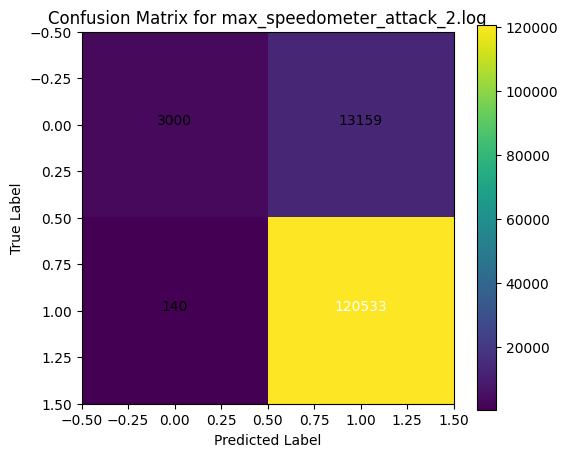

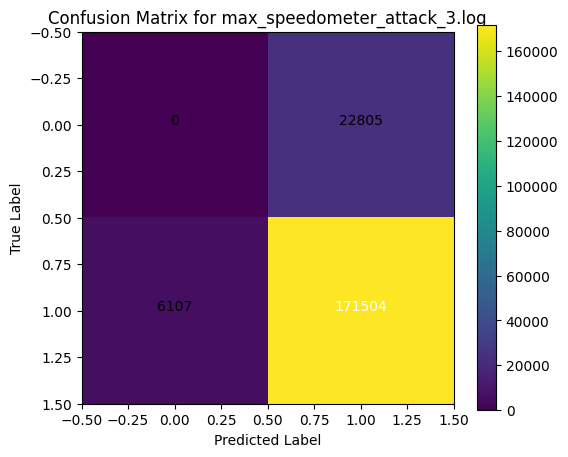

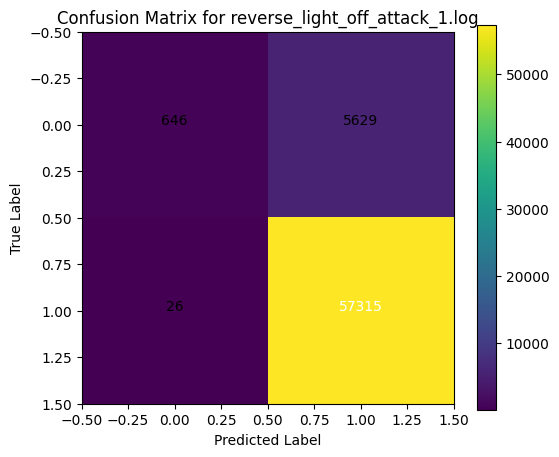

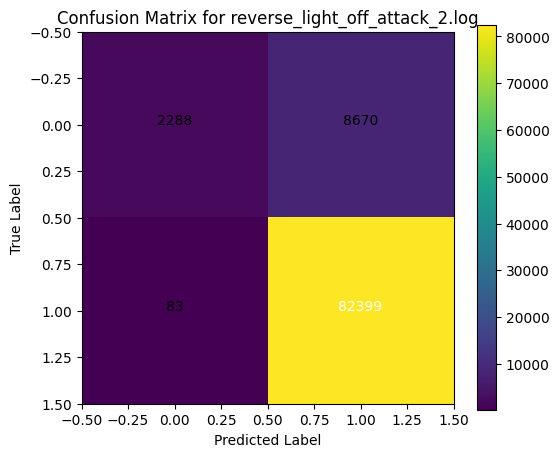

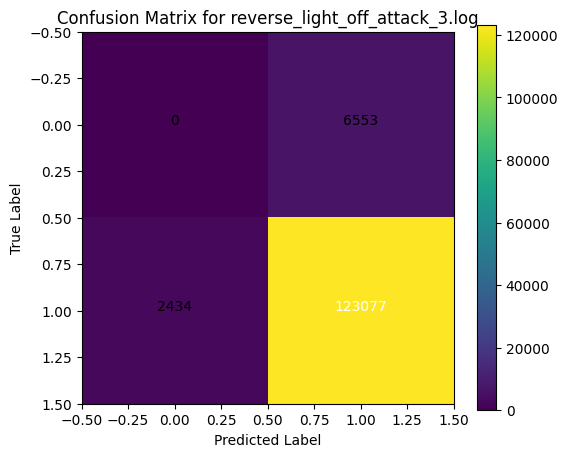

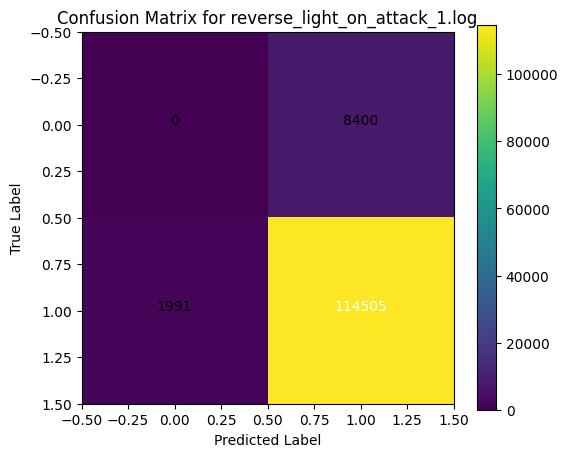

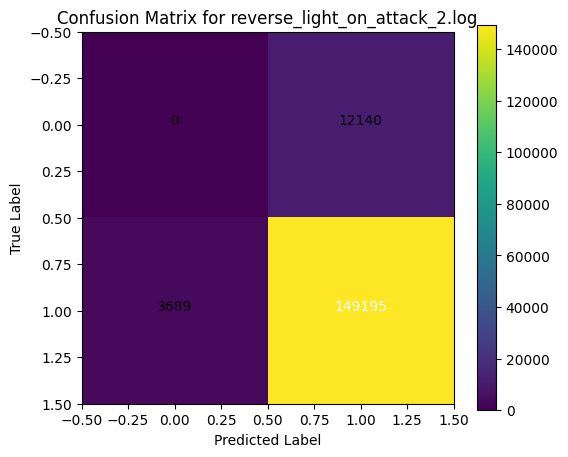

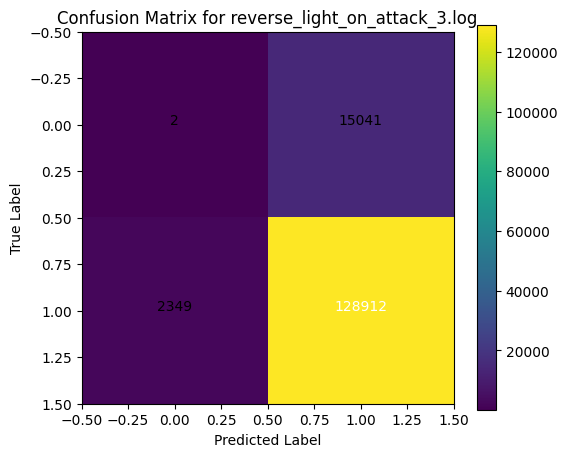

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

for file_data in results:
    filename, metrics = file_data
    confusion_matrix = metrics[4]  # Assuming the confusion matrix is the 5th element in the tuple
    matrix_max = max(max(row) for row in confusion_matrix)  # Find max in nested list

    plt.figure(figsize=(6, 5))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap='viridis')
    plt.title(f'Confusion Matrix for {filename}')
    plt.colorbar()

    # Annotate the heatmap
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix[i])):
            plt.text(j, i, format(confusion_matrix[i][j], 'd'),
                     horizontalalignment="center",
                     color="white" if confusion_matrix[i][j] > matrix_max / 2 else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

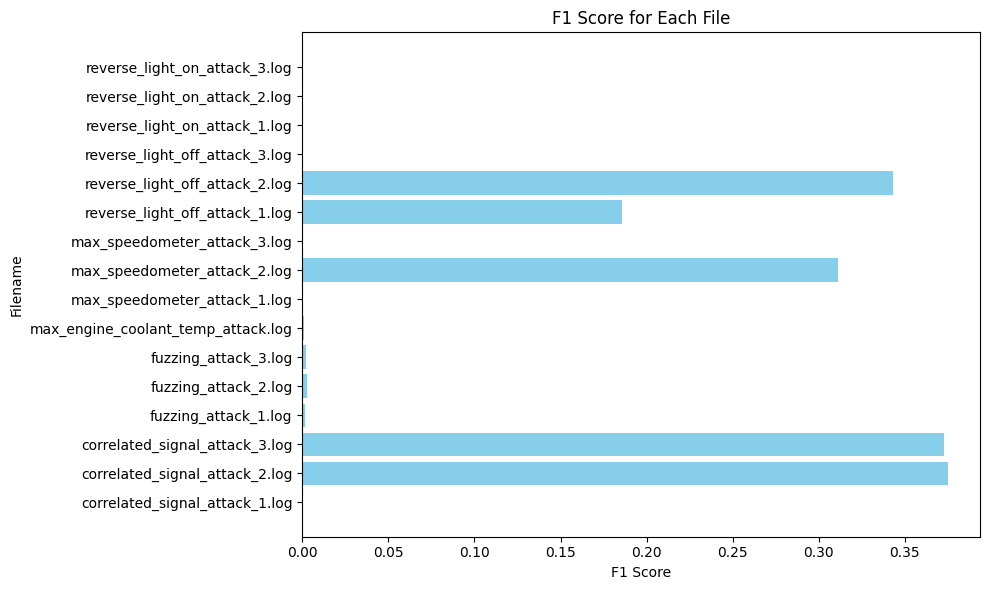

In [5]:
import matplotlib.pyplot as plt

#"results" is a list of tuples in the format ('filename', (accuracy, precision, recall, f1_score, confusion_matrix))
filenames = [result[0] for result in results]
F1s = [result[1][3] for result in results]

# Plotting using horizontal bars
plt.figure(figsize=(10, 6))
plt.barh(filenames, F1s, color='skyblue')
plt.xlabel('F1 Score')
plt.ylabel('Filename')
plt.title('F1 Score for Each File')
plt.tight_layout()
plt.show()

The following table is really ugly, but I can put it into excel or word or something if we want to use it for the report

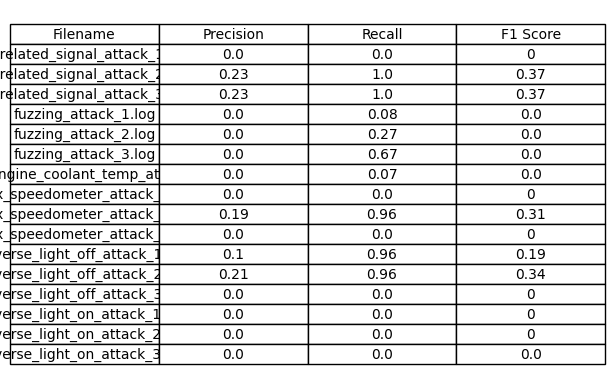

In [6]:
import matplotlib.pyplot as plt

#data extraction and round to 2 decimal places
filenames = [result[0] for result in results]
precisions = [round(result[1][1], 2) for result in results]
recalls = [round(result[1][2], 2) for result in results]
f1_scores = [round(result[1][3], 2) for result in results]

data = list(zip(filenames, precisions, recalls, f1_scores))

fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')

#text size can be adjusted here
text_size = 10

table = ax.table(cellText=data, colLabels=['Filename', 'Precision', 'Recall', 'F1 Score'], cellLoc = 'center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(text_size)
table.scale(1.2, 1.2) #can adjust for better spacing

plt.show()